# 25 ways to take a numerical derivative of noisy data without being a jerk

This notebook walks through each of the methods implemented in pynumdiff.

Some notes on notation and syntax:
  * dt: (float) time step (note: we concentrated on differentiating timeseries data, however these functions work for a 1-dimensional spatial derivative as well)
  * x: (np.array with length N) the time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is known when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is known when the data is simulated, and used for plotting purposes only)

In [1]:
# external imports
import numpy as np

# local imports
import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

import time

# 0. Simulate some data

pynumdiff comes with 6 different toy problems (choose the one that most resembles your data to see how the methods compare):
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dxdt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [2]:
# simulation parameters

# noise is generated using np.random, e.g. np.random.normal, np.random.uniform, np.random.poisson
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.01]

# time step and time series length
dt = 0.01
timeseries_length = 4 # steps

In [3]:
# simulate data

x, x_truth, dxdt_truth, h, u = simulate.pi_control(dt=dt,
                                                   timeseries_length=timeseries_length,
                                                   noise_type=noise_type, 
                                                   noise_parameters=noise_parameters)

# 1. Finite Difference

### 1.1 Finite Difference: First Order

RMS error in velocity:  0.709034586800889


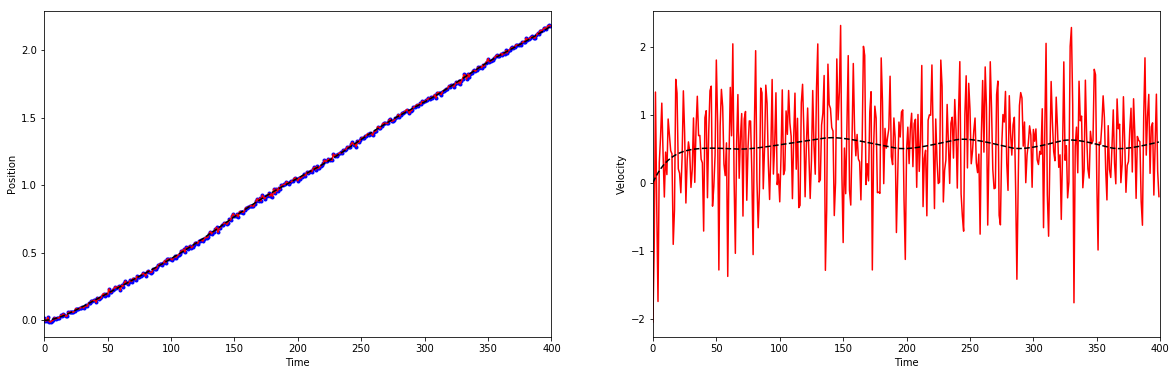

In [4]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 Finite Difference: Second Order

RMS error in velocity:  0.709034586800889


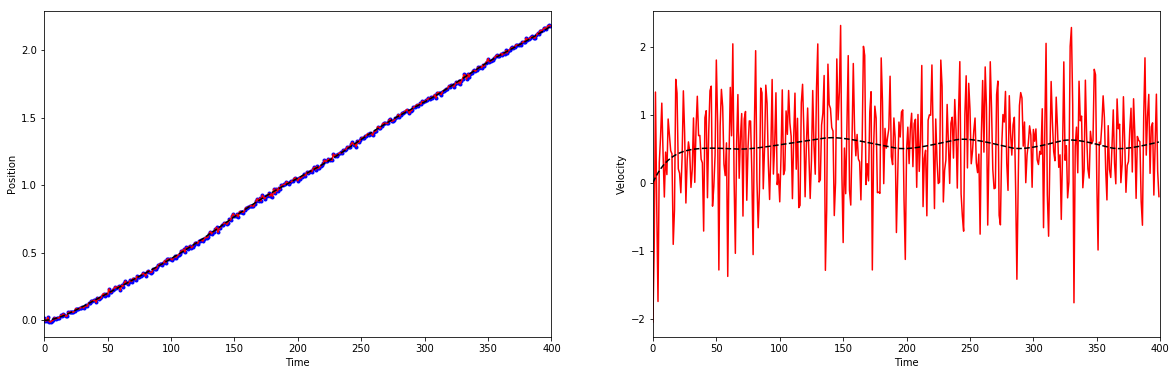

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Finite Difference: Iterated First Order

RMS error in velocity:  0.03252491277748987


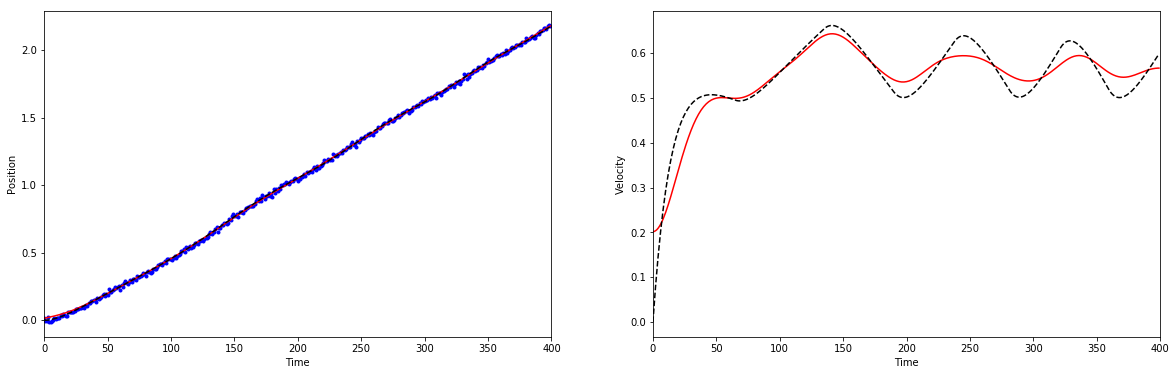

In [6]:
params = [500]
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

RMS error in velocity:  0.29910015980615257


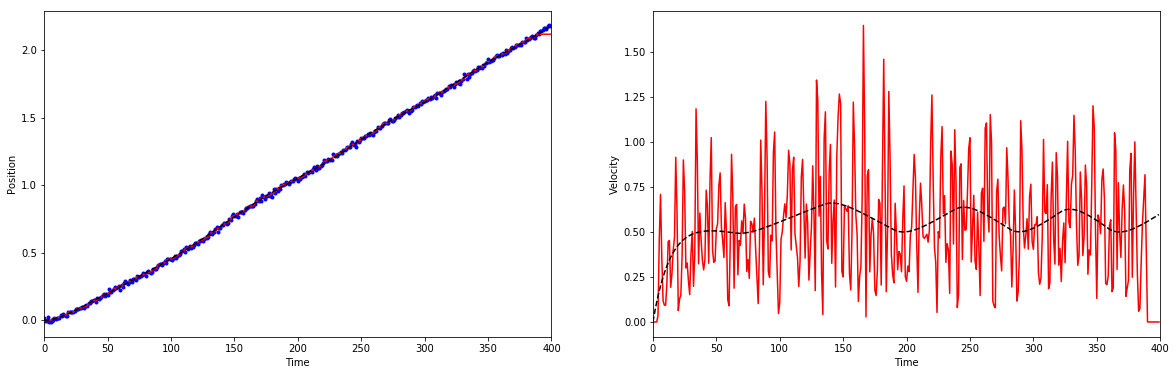

In [7]:
params = [20, 4]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.2 Smooth Finite Difference: Mean smoothing

RMS error in velocity:  0.10662750447356231


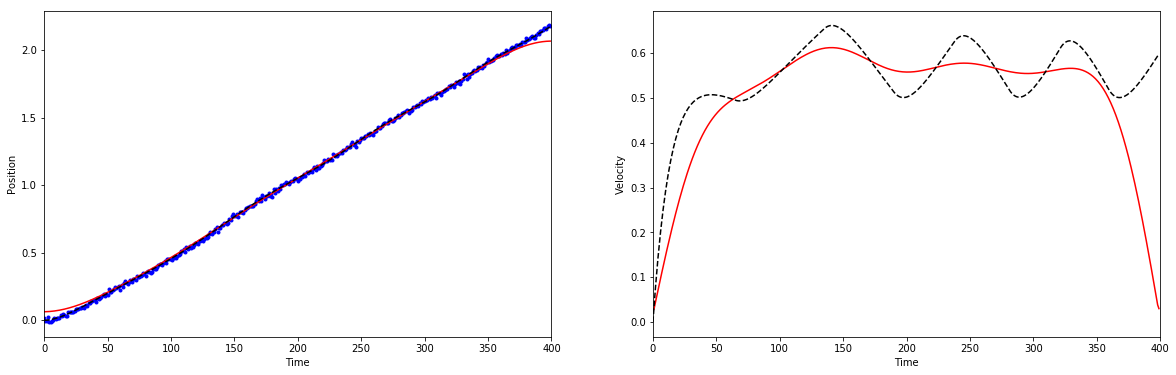

In [8]:
params = [40, 5]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.3 Smooth Finite Difference: Gaussian smoothing

RMS error in velocity:  0.0889602334361197


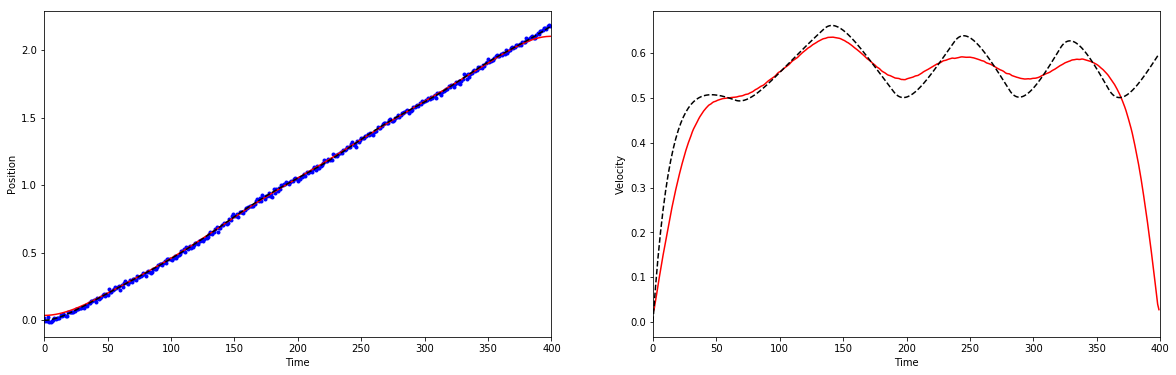

In [9]:
params = [100]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.4 Smooth Finite Difference: Friedrichs smoothing

RMS error in velocity:  0.06875230610512735


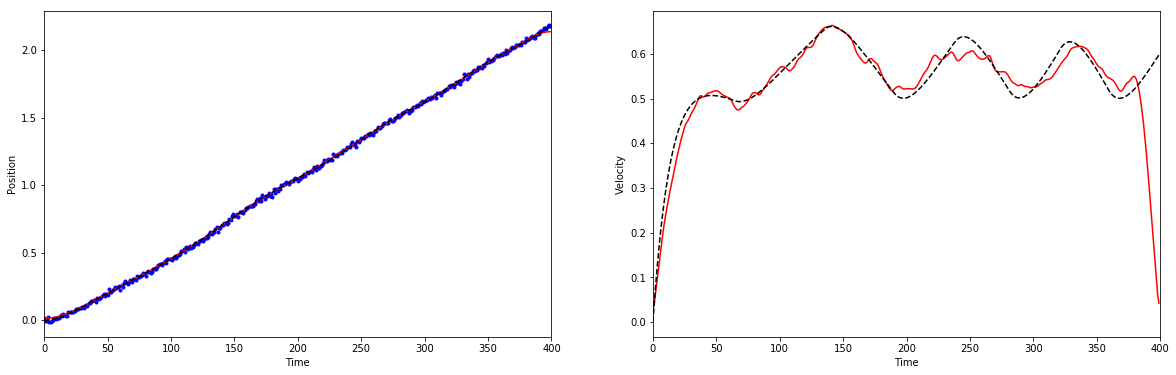

In [10]:
params = [50]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.5 Smooth Finite Difference: Butterworth smoothing

RMS error in velocity:  0.043613778466843243


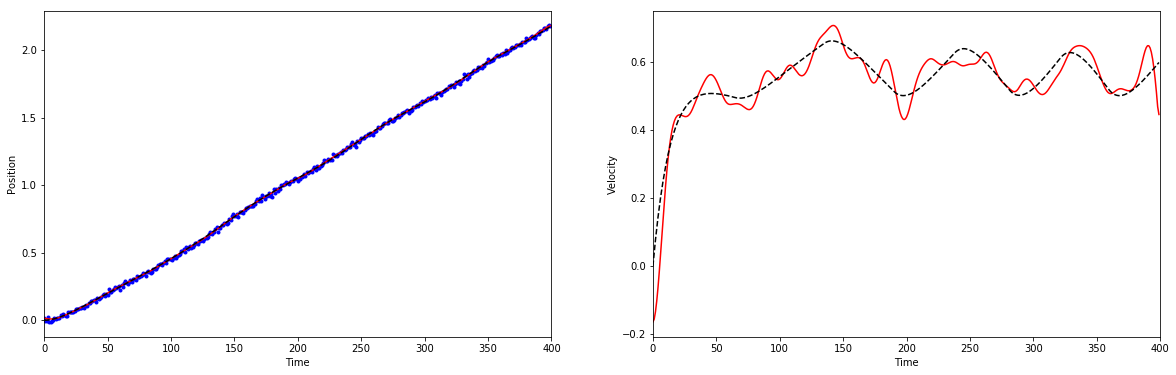

In [11]:
params = [3, 0.074]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.6 Smooth Finite Difference: Spline smoothing

RMS error in velocity:  0.05155834286558241


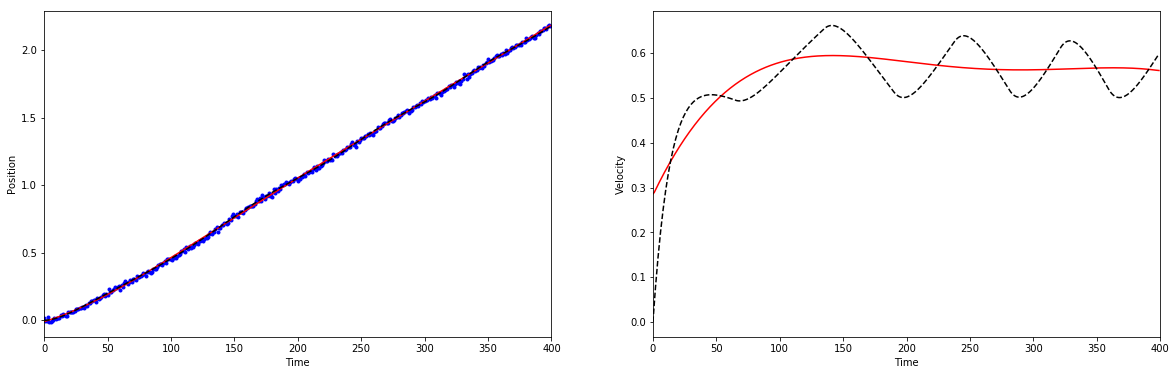

In [12]:
params = [5, 2]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 3. Total Variation Regularization

### 3.1 Iterative Total Variation Regularization (regularized velocity)

RMS error in velocity:  0.0343727352267017


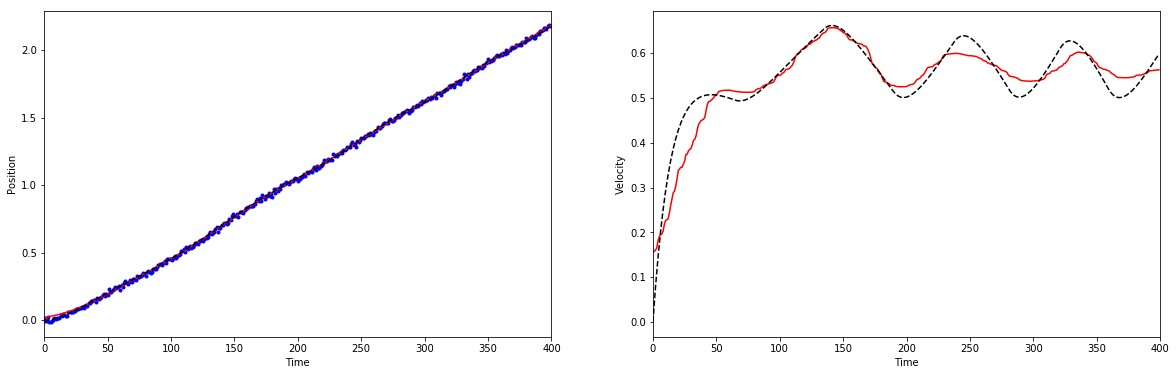

In [13]:
params = [1, 0.05]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Convex Total Variation Regularization: regularize velocity

RMS error in velocity:  0.03503108931093832


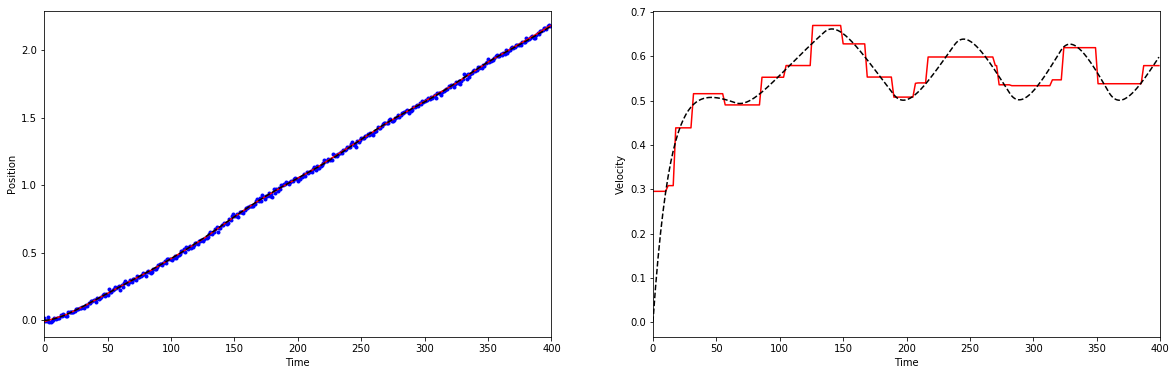

In [14]:
params = [0.5]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Convex Total Variation Regularization: regularize acceleration

RMS error in velocity:  0.022841411544055057


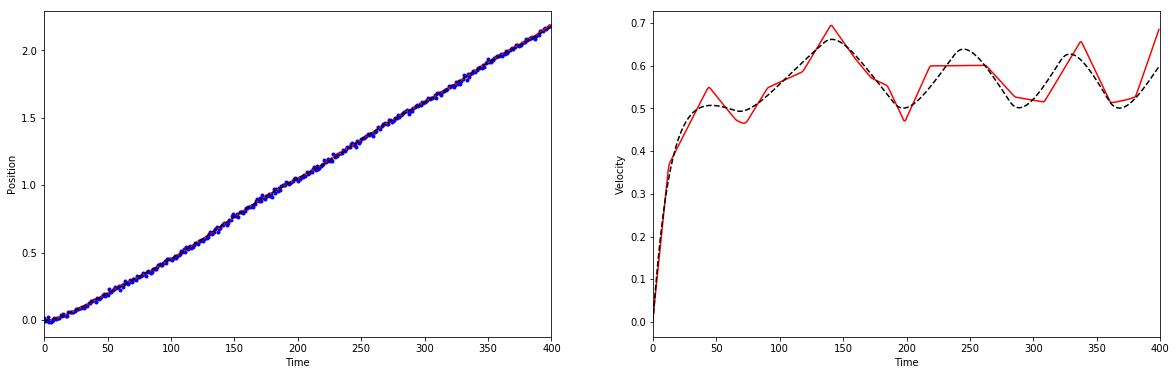

In [15]:
params = [1]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.4  Convex Total Variation Regularization: regularize jerk

RMS error in velocity:  0.021209153634249342


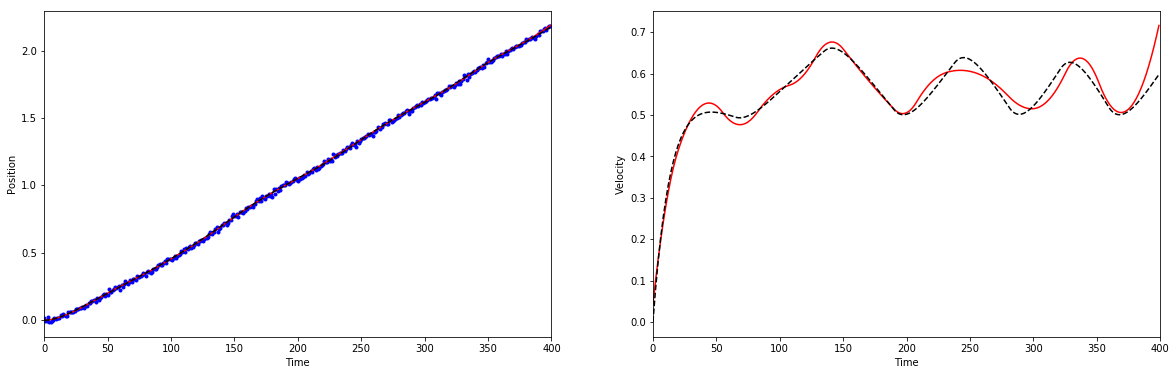

In [16]:
params = [10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.5 Convex Total Variation Regularization: regularize acceleration with gaussian smoothing

RMS error in velocity:  0.026582497637736895


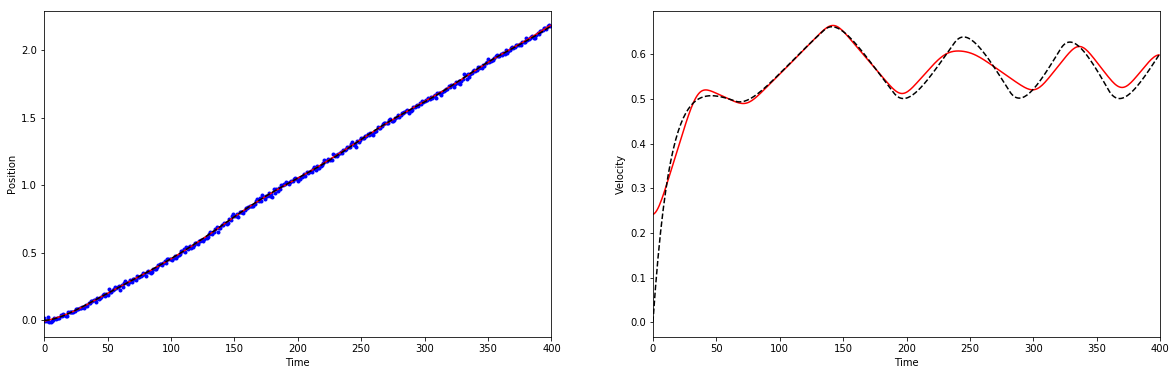

In [17]:
params = [5, 30]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 4. Linear Models

### 4.1 Linear Models: Spectral derivative

RMS error in velocity:  0.09026668854175515


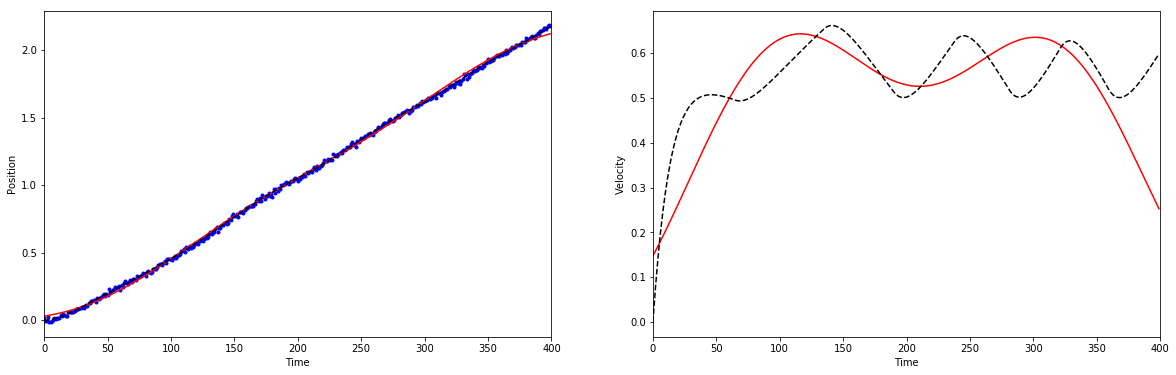

In [18]:
params = [0.005]
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Linear Models: Sliding polynomial fit

RMS error in velocity:  0.021943820788061976


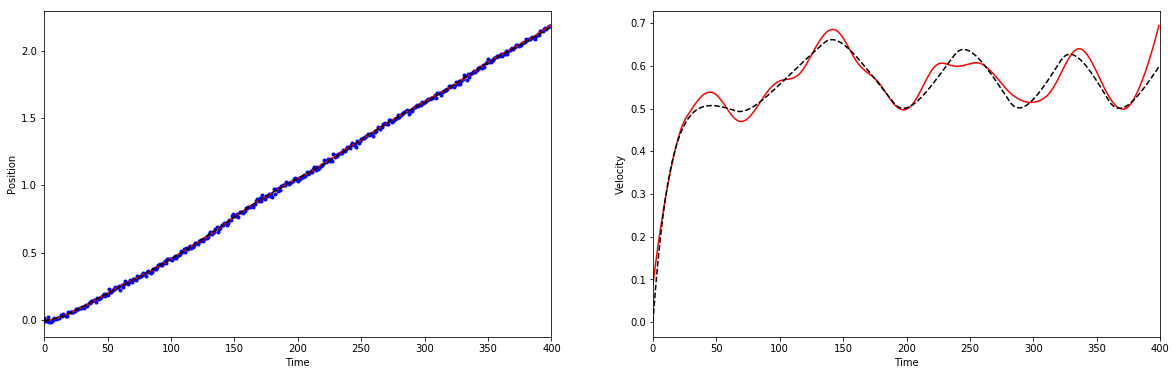

In [19]:
params = [2, 60]
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 Linear Models: Savitzky-Golay filter

RMS error in velocity:  0.02585874246360081


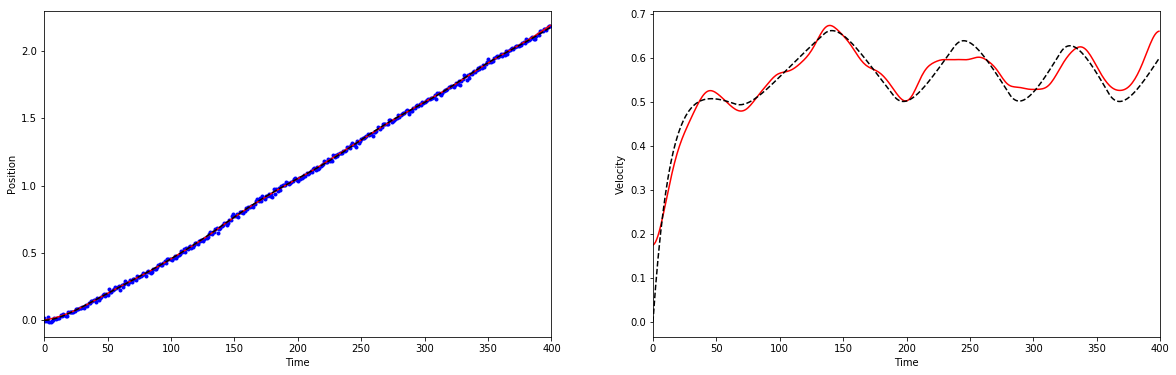

In [20]:
params = [2, 30]
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, params, options={'smooth': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.4 Linear Models: Sliding chebychev polynomial fit

RMS error in velocity:  0.07827873192953949


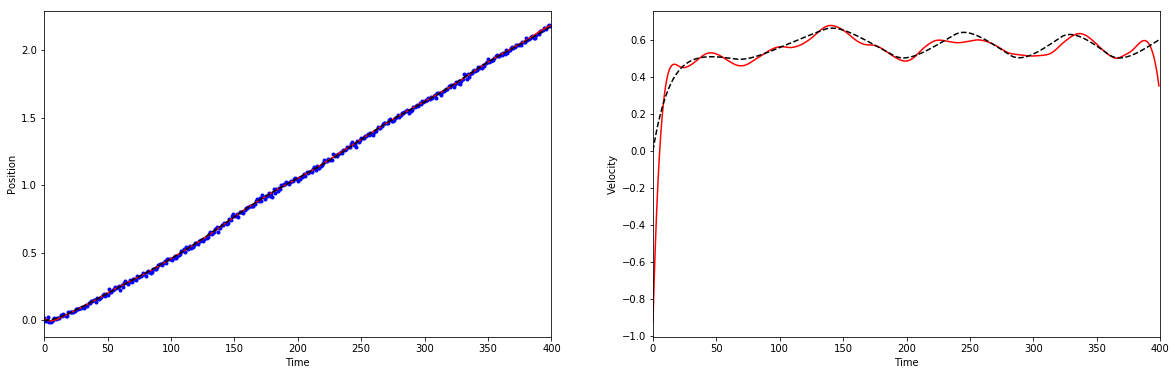

In [21]:
params = [2, 60]
x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.5 Linear Models: Sliding dynamic mode decomposition fit

RMS error in velocity:  0.03500858135271973


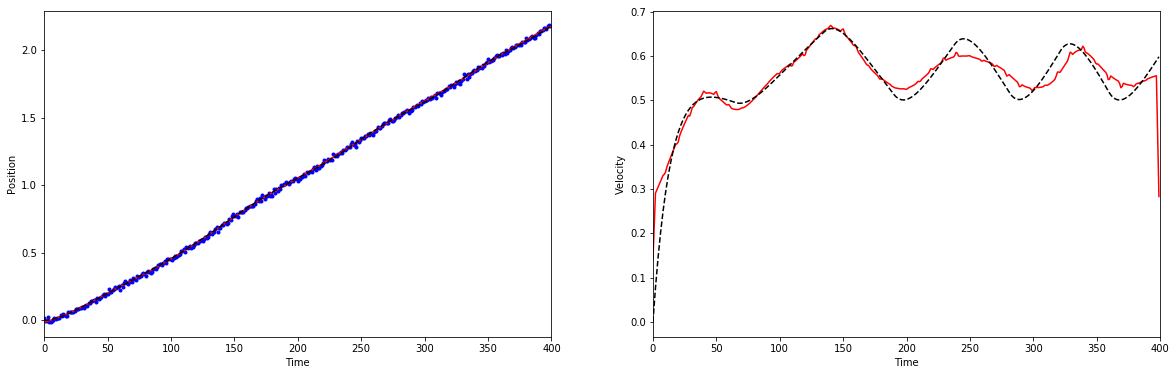

In [22]:
params = [100, 3, 60]
x_hat, dxdt_hat = pynumdiff.linear_model.dmddiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.6 Linear Models: Sliding linear time invariant system fit

RMS error in velocity:  0.3105222366346903


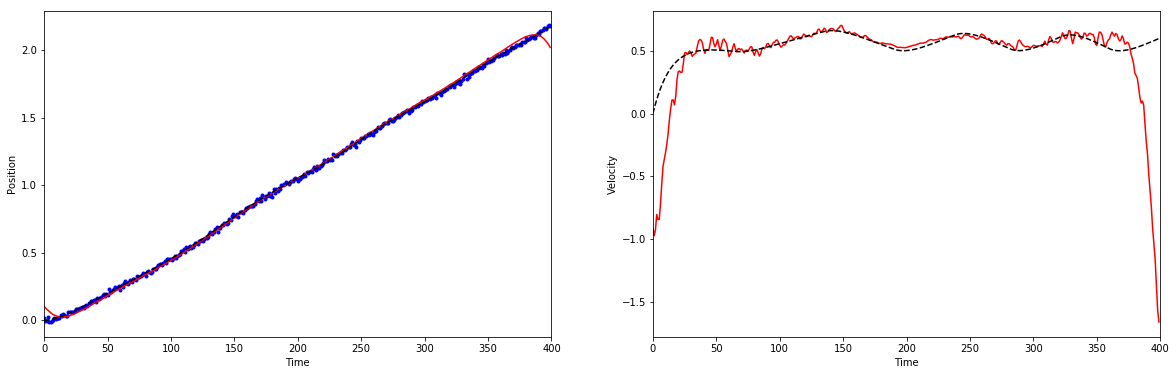

In [23]:
params = [3, 5, 100]
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

RMS error in velocity:  0.06918893714563067


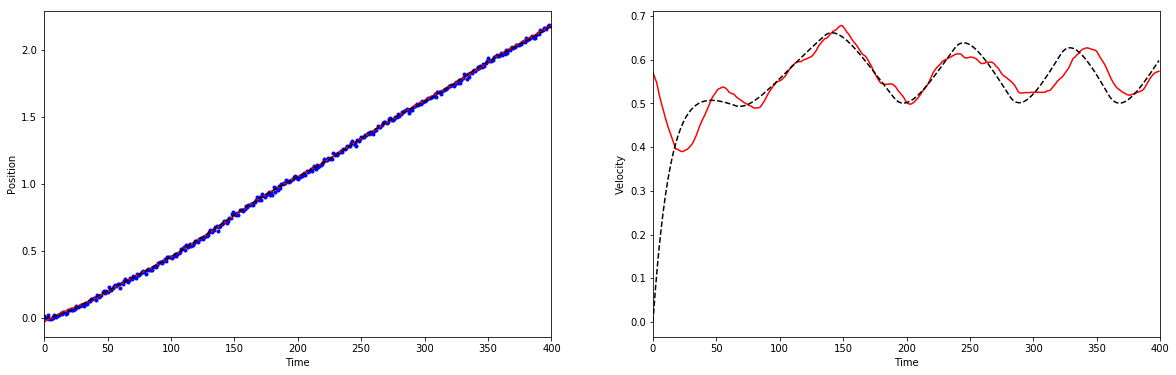

In [24]:
params = [noise_parameters[1]**2, 1e-5]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

RMS error in velocity:  0.022471482000172353


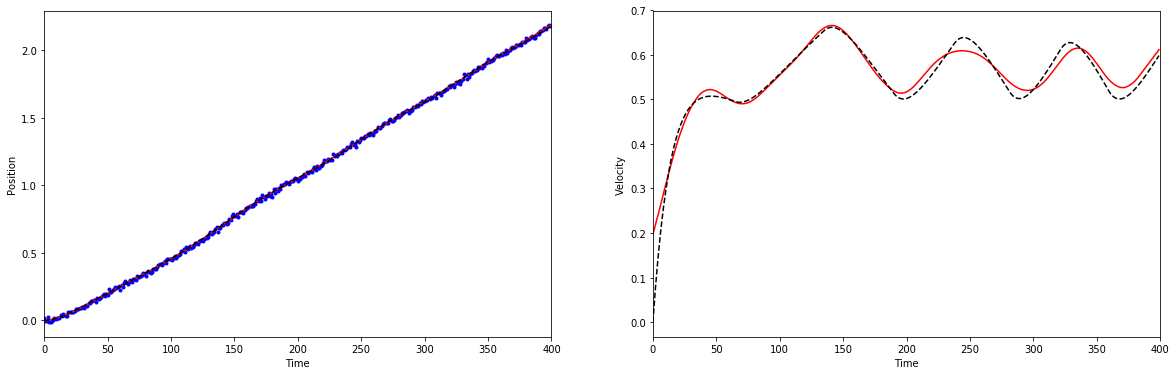

In [25]:
params = [noise_parameters[1]**2, 1e-2]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

RMS error in velocity:  0.05296512683788399


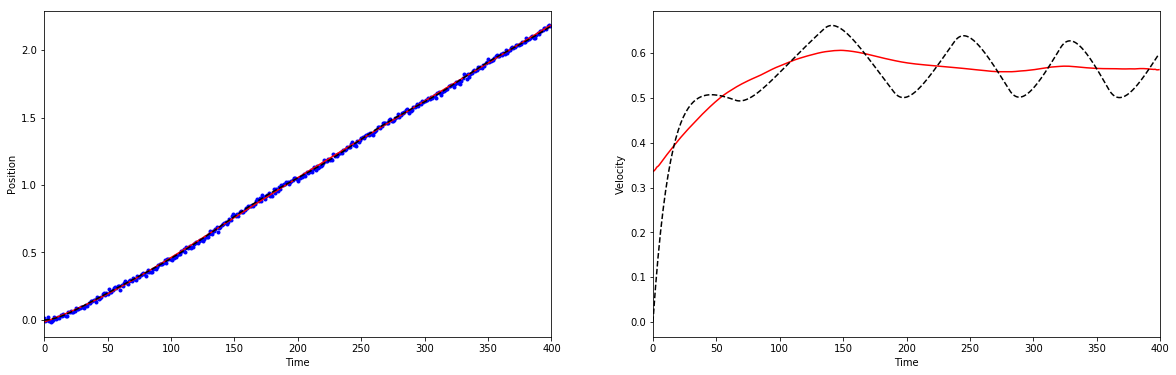

In [26]:
params = [noise_parameters[1]**2, 1e-4]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# Neural networks

### 6.1 Neural net: adam optimizer

RMS error in velocity:  0.07731954282142506


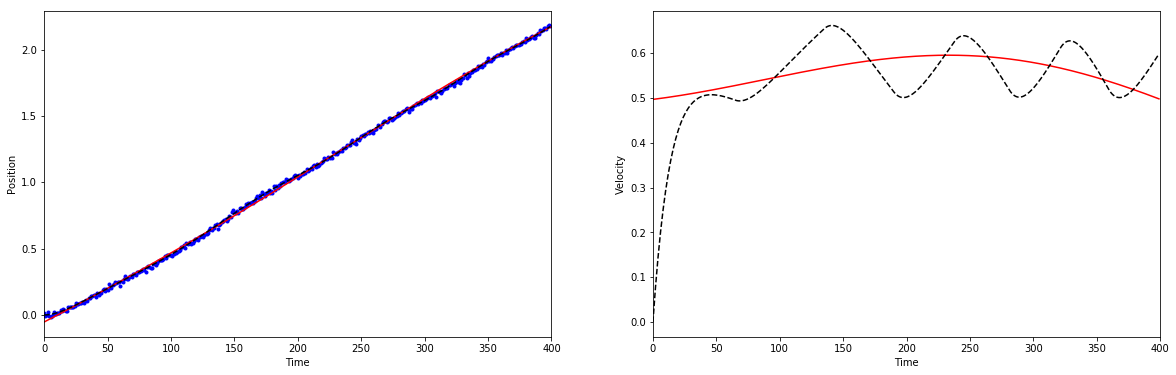

In [27]:
params = [300, 10, 0.001, 200]
x_hat, dxdt_hat = pynumdiff.nnet.adam(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 6.1 Neural net: quasi Newton optimizer

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


RMS error in velocity:  0.05764752907385157


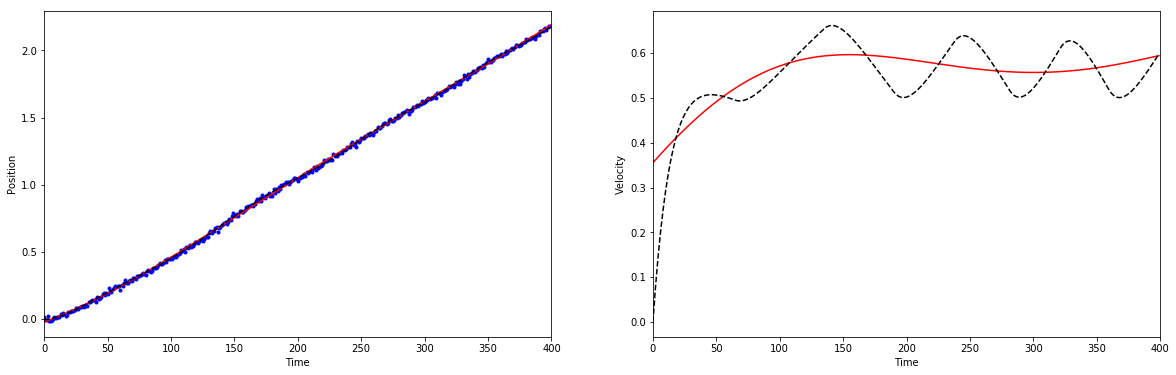

In [28]:
params = []
x_hat, dxdt_hat = pynumdiff.nnet.quasinewton(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)